TensorFlow 2.x 기반의 MNIST 학습 및 검증 예제

1. 학습데이터와 테스트 데이터를 255.0 으로 나누어서 정규화 시킴

2. 정답데이터를 one-hot encoding 시킴

3. Flatten(input_shape=(28,28,1)) 이용하여 input_layer 생성함. 이게 가능하다면 cifar10 에서는 input_shape=(28,28,3) 등으로 나타내도 될것 같음 

4. 정답데이터를 one-hot encoding 하였기 때문에 model.compile() 에서 loss 는
loss='categorical_crossentropy' 지정함. 만약 정답 데이터를 one-hot encoding 시키지 않는다면 loss='sparse_categorical_crossentropy' 같이 지정해야 함

5. model.predict() 수행할때는, 텐서형태로 reshape 시켜서 해주어야함

6. 입력층을 표시할때, Dense(..,input_dim=784,...) 등으로 나타내면 error 발생. error 없이 실행하기 위해서는 Flatten(input_shape=(28,28)) 같이 tensor 표현해야 함. 즉 Flatten(input_shape=(784,)) 같이 vector 표시하면 warning 발생함

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

print(tf.__version__)

2.2.0


In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()   

print('')
print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)

11493376/11490434 [==============================] - 0s 0us/step

x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


In [3]:
import numpy as np

# 정규화 및 one-hot encoding 확인
print('max = ', x_train[0].max(),', min = ', x_train[0].min(), '\n\nlabel = ', t_train[0])

max =  255 , min =  0 

label =  5


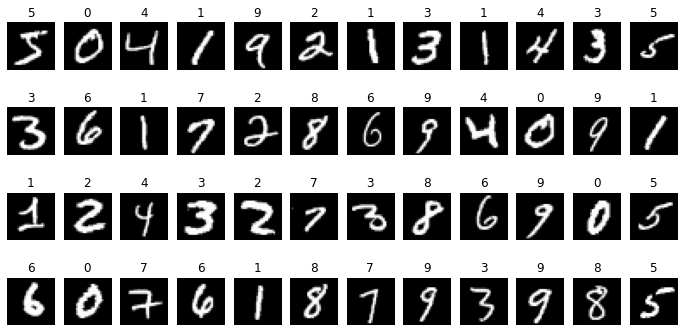

In [4]:
import matplotlib.pyplot as plt

# 48개의 이미지 출력
plt.figure(figsize=(12, 6))  # (6,1), (12,1), (12,6), (6,6) 등으로 다양하게 해본다

for index in range(48):    # 48 개 이미지 출력

    plt.subplot(4, 12, index + 1)  # 4행 12열 
    plt.imshow(x_train[index], cmap='gray')    # 1행 1열 -> 1행 2열 -> ...-> 1행 12열 -> 2행 1열 -> ...
    plt.axis('off')  # plt.axis('off) 하면 x, y 축의 0~25 사라짐    
    plt.title(str(t_train[index]))

plt.show()

In [5]:
# x_train, x_test 값 범위를 0 ~ 1 사이로 정규화

x_train = x_train / 255.0
x_test = x_test / 255.0

# 정규화 결과 확인
print('train max = ', x_train[0].max(),', train min = ', x_train[0].min())
print('test max = ', x_train[0].max(),', test min = ', x_train[0].min())

train max =  1.0 , train min =  0.0
test max =  1.0 , test min =  0.0


In [6]:
# 정답 데이터 one-hot encoding
t_train = to_categorical(t_train, 10)
t_test = to_categorical(t_test, 10)

# one-hot encoding 확인
print('train label = ', t_train[0], ', decimal value = ', np.argmax(t_train[0]))
print('test label = ', t_test[0], ', decimal value = ', np.argmax(t_test[0]))

train label =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] , decimal value =  5
test label =  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] , decimal value =  7


In [0]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28, 1)))  


model.add(Dense(100, activation='relu'))     


model.add(Dense(10, activation='softmax'))

In [10]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(lr=0.1), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
# layers 속성으로 각 층의 특성을 미리 볼수 있음

layer1 = model.layers[0]
layer2 = model.layers[1]
layer3 = model.layers[2]

print(layer1.name, type(layer1), layer1.output_shape, layer1.count_params())
print(layer2.name, type(layer2), layer2.output_shape, layer2.count_params())
print(layer3.name, type(layer3), layer3.output_shape, layer3.count_params())

flatten <class 'tensorflow.python.keras.layers.core.Flatten'> (None, 784) 0
dense <class 'tensorflow.python.keras.layers.core.Dense'> (None, 100) 78500
dense_1 <class 'tensorflow.python.keras.layers.core.Dense'> (None, 10) 1010


In [12]:
hist = model.fit(x_train, t_train, epochs=50, batch_size=100, validation_split=0.2)

Epoch 1/50
480/480 [==============================] - 2s 3ms/step - loss: 0.4727 - accuracy: 0.8715 - val_loss: 0.2887 - val_accuracy: 0.9168
Epoch 2/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.9235 - val_loss: 0.2260 - val_accuracy: 0.9353
Epoch 3/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2163 - accuracy: 0.9379 - val_loss: 0.1966 - val_accuracy: 0.9452
Epoch 4/50
480/480 [==============================] - 1s 3ms/step - loss: 0.1842 - accuracy: 0.9467 - val_loss: 0.1755 - val_accuracy: 0.9521
Epoch 5/50
480/480 [==============================] - 1s 3ms/step - loss: 0.1601 - accuracy: 0.9535 - val_loss: 0.1565 - val_accuracy: 0.9570
Epoch 6/50
480/480 [==============================] - 1s 3ms/step - loss: 0.1416 - accuracy: 0.9593 - val_loss: 0.1436 - val_accuracy: 0.9597
Epoch 7/50
480/480 [==============================] - 1s 3ms/step - loss: 0.1266 - accuracy: 0.9638 - val_loss: 0.1335 - val_accuracy: 0.9639
Epoch 

In [13]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9768


[0.07921986281871796, 0.9768000245094299]

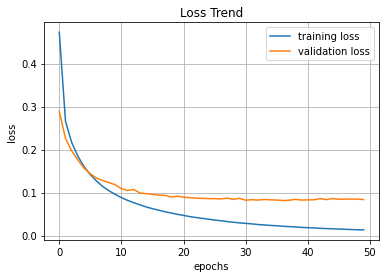

In [14]:
# 손실함수 그래프

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

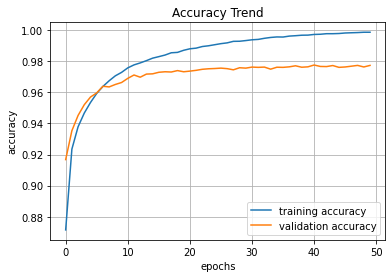

In [15]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

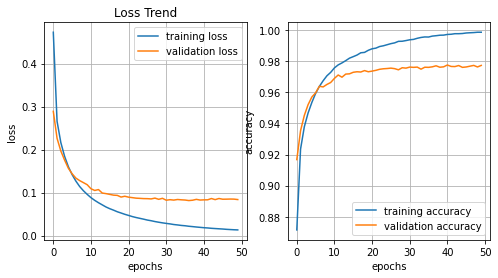

In [16]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

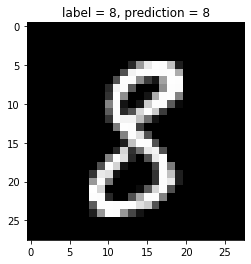

In [17]:
random_index = np.random.randint(len(x_test))

# 채널 표시할때 reshape(1,28,28,1) 해줌
# reshape(1,28,28) 실행해도 OK
predicted_val = model.predict(x_test[random_index].reshape(1, 28, 28, 1))  

# 여기서 reshape(28,28,1) 하면 error 발생

title_str = 'label = ' + str(np.argmax(t_test[random_index])) + ', prediction = ' + str(np.argmax(predicted_val))

plt.title(str(title_str))
plt.imshow(x_test[random_index].reshape(28, 28), cmap='gray')  
#plt.axis('off')

plt.show()